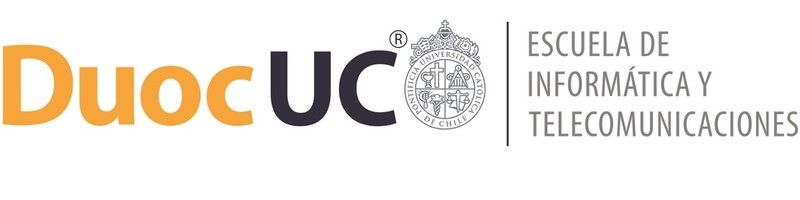

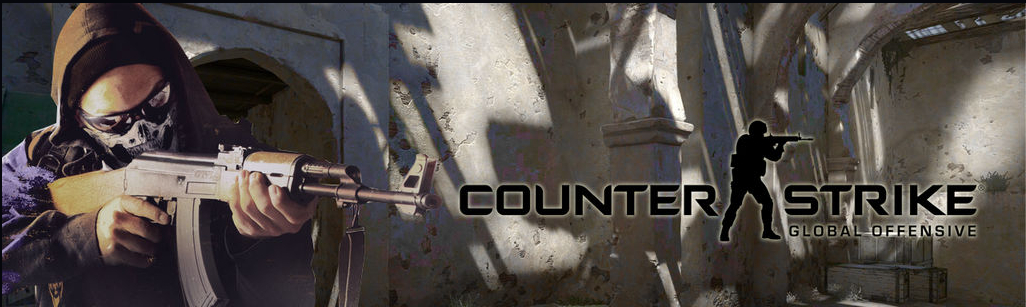

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Álvaro Flores, Aurora Mansilla, Ricardo Ojeda, Ella Zampeze

Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1.1: Business Understanding

## Objetivo del proyecto

El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

# Hipótesis

H1: A mayor valor de equipamiento inicial , mayor será el tiempo que un jugador sobrevive . Esto se va a extraer del tiempo de vida de los jugadores durante las partidas (regresión).


H2: El tipo de arma principal se relaciona con el tiempo de vida del jugador. Se hará un conteo de la probabilidad de supervivencia clasificando por el tipo de arma, así se realizará la comparación entre datos (clasificación).


## Fase 1.2: Data Understanding

In [1]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

# NOTA: Este código debe ser modificado en caso de no haber renombrado el archivo .csv como se indica.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Leer CSV con separador ;
df = pd.read_csv("csgo_ET2022.csv", sep=";")

# Vista general del dataset
print(f"") #----
print(df.shape)
print(f"") #----
print(df.columns)
print(f"") #----
df.info()

Saving csgo_ET2022.csv to csgo_ET2022.csv

(79157, 30)

Index(['id', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team   

/tmp/ipython-input-1-3528067659.py:19: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_ET2022.csv", sep=";")


In [2]:
df.head()

,id,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [3]:
df.describe()

,id,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [4]:
# Ver si hay valores nulos
df.isnull().sum()

,0
id,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


# Fase 3: Data Preparation | Limpieza general

In [5]:
# Copiar dataset original
df_clean = df[df["AbnormalMatch"] == False].copy()  # Eliminar partidas con error de red

# Limpiar y convertir TimeAlive a segundos (dividir por 1e14)
# NOTA: una ronda normal en CS:GO dura en promedio entre 15 y 155 segundos
df_clean["TimeAlive"] = df_clean["TimeAlive"].str.replace(".", "", regex=False)
df_clean["TimeAlive"] = pd.to_numeric(df_clean["TimeAlive"], errors="coerce") / 1e14

# Filtrar valores de TimeAlive fuera del rango normal de una ronda
df_clean = df_clean[(df_clean["TimeAlive"] >= 15) & (df_clean["TimeAlive"] <= 155)]

# Limpiar y convertir TravelledDistance (remover puntos y convertir a metros)
# NOTA: un jugador en CS:GO puede recorrer de 10 a 150 metros aprox.
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].astype(str).str.replace(",", ".", regex=False)
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].str.replace(".", "", regex=False)
df_clean["TravelledDistance"] = pd.to_numeric(df_clean["TravelledDistance"], errors="coerce") / 1e15

# Eliminar outliers en RoundStartingEquipmentValue usando IQR
Q1 = df_clean["RoundStartingEquipmentValue"].quantile(0.25)
Q3 = df_clean["RoundStartingEquipmentValue"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[
    (df_clean["RoundStartingEquipmentValue"] >= lower_bound) &
    (df_clean["RoundStartingEquipmentValue"] <= upper_bound)
]

In [6]:
print(df_clean[["TimeAlive", "TravelledDistance"]].describe()) # revisamos cómo afectó esta limpieza a las columnas 'TimeAlive' y 'TravelledDistance'.

          TimeAlive  TravelledDistance
count  56214.000000       56214.000000
mean      75.080981          11.881881
std       27.673434          12.302108
min       15.033467           0.000000
25%       52.192211           5.462743
50%       74.951775           9.088984
75%       95.410775          13.355638
max      154.548722          65.530265


## Trabajo de limpieza sobre dato erróneo (Jugador 629)

In [7]:
# Se analiza RoundWinner y MatchWinner en busca valores distintos y se pasan a booleano
print(df['RoundWinner'].unique())
print(df['MatchWinner'].unique())
nulos_matchwinner = df['MatchWinner'].isnull().sum()
print(f"Cantidad de valores NaN en MatchWinner: {nulos_matchwinner}")

['False' 'True' 'False4' True False]
[True False nan]
Cantidad de valores NaN en MatchWinner: 1


In [8]:
# Encontrar la fila donde se encuentra el valor 'False4'
errores_roundwinner = df_clean[df_clean['RoundWinner'] == 'False4']

# Mostrar las columnas afectadas
print(errores_roundwinner[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner']])

     id         Map  InternalTeamId  MatchId  RoundId RoundWinner
29  629  de_inferno               2        4        3      False4


In [9]:
# Buscar todos los jugadores de MatchId=4 y RoundId=3 y las columnas afectadas
ronda_especifica = df_clean[
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3)
]
print(ronda_especifica[['id', 'InternalTeamId', 'RoundWinner']])

     id  InternalTeamId RoundWinner
21  621               1        True
22  622               1        True
24  624               1        True
25  625               2       False
26  626               2       False
27  627               2       False
28  628               2       False
29  629               2      False4


In [10]:
# Se cambia dato de 'False4' por 'False' al jugador correspondiente.
df_clean.loc[
    (df_clean['id'] == 629) &
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3),
    'RoundWinner'
] = False

# Mapear los valores para corregir 'True' y 'False' como booleanos reales
df_clean['RoundWinner'] = df_clean['RoundWinner'].map({
    'True': True,
    'False': False,
    True: True,
    False: False
})

# Volver a listar los valores únicos de RoundWinner
print(df_clean['RoundWinner'].unique())

[False  True]


# Tratamiento de nulos

#### Previamente pudimos observar cómo habian datos nulos en las columnas 'Team' y 'MatchWinner'. Estos valores serán tratados a continuación:

In [11]:
print(df_clean['MatchWinner'].unique())
print(df_clean['Team'].unique())

[True False nan]
['Terrorist' 'CounterTerrorist' nan]


In [12]:
# Mostrar la fila que tiene MatchWinner nulo
fila_matchwinner_nulo = df_clean[df_clean['MatchWinner'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

print(f"")
# Mostrar las filas que tiene Team nulo
fila_matchwinner_nulo = df_clean[df_clean['Team'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId MatchWinner
29  629  de_inferno               2        4        3         NaN

     id         Map Team  InternalTeamId  MatchId  RoundId MatchWinner
13  613  de_inferno  NaN               1        4        2        True
27  627  de_inferno  NaN               2        4        3       False


## Tratamiento para el valor nulo en 'MatchWinner'
Previamente nos encontramos con el mismo jugador 629 el cual presentaba problemas de error de tipeo en un dato False.

Los datos que ahora tenemos para el tratamiento del nulo es:

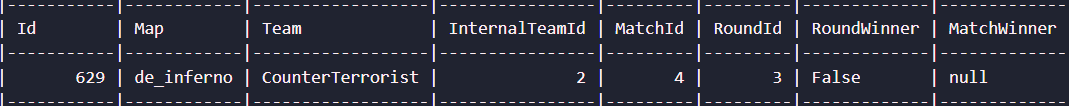

In [13]:
# Filtrar todas las filas del MatchId 4
partida = df_clean[df_clean['MatchId'] == 4]

# Analizar qué equipo ganó más rondas
rondas_ganadas = partida.groupby('Team')['RoundWinner'].sum()

print(rondas_ganadas)

Team
CounterTerrorist    21
Terrorist           63
Name: RoundWinner, dtype: int64


In [14]:
# Dado que el jugador 629 tiene como 'Team' CounterTerrorist ahora podemos agregar el valor correspondiente en 'MatchWinner', es decir, False
df_clean.loc[
    (df_clean['id'] == 629),
    'MatchWinner'
] = False

In [15]:
# Verificamos los nuevos valores
print(df_clean.loc[(df_clean['id'] == 629) & (df_clean['MatchId'] == 4), ['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId  RoundWinner MatchWinner
29  629  de_inferno               2        4        3        False       False


# Tratamiento de valores nulos en 'Team'

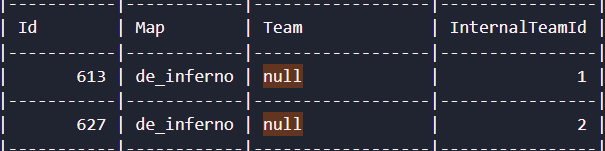

In [16]:
# Mostrar las combinaciones únicas entre InternalTeamId y Team
combinaciones = df_clean[["MatchId", "InternalTeamId", "Team"]].drop_duplicates()
display(combinaciones.sort_values(["InternalTeamId", "Team"]))

# Contar cuántas veces cada InternalTeamId se asocia a cada Team
conteo = df_clean.groupby(["InternalTeamId", "Team"]).size().reset_index(name='Cantidad')
display(conteo.sort_values("InternalTeamId"))

# Verificar si dentro de una misma partida (MatchId) los equipos cambian su rol (T o CT)
cambio_en_partidas = df_clean.groupby(["MatchId", "InternalTeamId", "Team"]).size().reset_index(name='Recuento')
display(cambio_en_partidas.sort_values(["MatchId", "InternalTeamId"]))

# Identificar casos donde el mismo InternalTeamId se asocia a ambos bandos en distintas partidas
pivot = conteo.pivot(index="InternalTeamId", columns="Team", values="Cantidad")
display(pivot)

,MatchId,InternalTeamId,Team
153,4,1,CounterTerrorist
343,6,1,CounterTerrorist
539,9,1,CounterTerrorist
783,10,1,CounterTerrorist
899,11,1,CounterTerrorist
...,...,...,...
78032,505,2,Terrorist
78255,506,2,Terrorist
78692,509,2,Terrorist
78962,510,2,Terrorist


,InternalTeamId,Team,Cantidad
0,1,CounterTerrorist,11015
1,1,Terrorist,17006
2,2,CounterTerrorist,17199
3,2,Terrorist,10992


,MatchId,InternalTeamId,Team,Recuento
0,4,1,CounterTerrorist,32
1,4,1,Terrorist,52
2,4,2,CounterTerrorist,59
3,4,2,Terrorist,31
4,6,1,CounterTerrorist,4
...,...,...,...,...
1304,510,1,Terrorist,56
1305,510,2,CounterTerrorist,54
1306,510,2,Terrorist,47
1307,511,1,Terrorist,14


Team,CounterTerrorist,Terrorist
InternalTeamId,,
1,11015,17006
2,17199,10992


In [17]:
# Filtramos los valores de matchid 510 donde internal team id 2 es terrorist y counterterrorist
filtered_df = df_clean[
    (df_clean['MatchId'] == 510) &
    (
        (df_clean['InternalTeamId'] == 2) &
        ((df_clean['Team'] == 'Terrorist') | (df_clean['Team'] == 'CounterTerrorist'))
    )
]

print(filtered_df[['MatchId', 'InternalTeamId', 'Team']])

       MatchId  InternalTeamId              Team
78812      510               2  CounterTerrorist
78814      510               2  CounterTerrorist
78815      510               2  CounterTerrorist
78816      510               2  CounterTerrorist
78822      510               2  CounterTerrorist
...        ...             ...               ...
79093      510               2         Terrorist
79094      510               2         Terrorist
79095      510               2         Terrorist
79096      510               2         Terrorist
79106      510               2         Terrorist

[101 rows x 3 columns]


## Justificación para imputación de valores nulos en Team

Durante el análisis del MatchId = 4, se identificaron dos jugadores con valores nulos en la columna Team, los cuales fueron imputados de forma razonada:

* **Jugador con Id = 627:**
A pesar de tener Team = NaN, comparte InternalTeamId = 2 con otros jugadores clasificados como "CounterTerrorist". Además, su valor de MatchKills = 2 y RoundKills = 1 sugiere que había participado en rondas previas. Comparando con el jugador Id = 617, que tiene las kills complementarias en la misma partida y equipo, se concluye que ambos registros corresponden al mismo jugador reconectado, validando así la imputación como "CounterTerrorist".

* **Jugador con Id = 613:**
Posee TeamStartingEquipmentValue = 1300, valor que comparte con otros cuatro jugadores clasificados como "Terrorist" en el mismo MatchId. Además, su InternalTeamId = 1 concuerda con el equipo Terrorist en dicha partida. Por lo tanto, se imputa razonablemente como "Terrorist".

Estas imputaciones permiten mantener la integridad de las variables categóricas sin introducir sesgo, apoyadas tanto por patrones de juego como por estadísticas internas del dataset.

In [18]:
# Luego de todo el análisis podemos agregar los valores concordantes
df_clean.loc[
    (df_clean['id'] == 627),
    'Team'
] = 'CounterTerrorist'

df_clean.loc[
    (df_clean['id'] == 613),
    'Team'
] = 'Terrorist'

In [19]:
# Verificar si hay valores nulos en las columnas 'Team' y 'MatchWinner' después de la limpieza
print("\nValores nulos después del tratamiento:")
print(df_clean[['Team', 'MatchWinner']].isnull().sum())


Valores nulos después del tratamiento:
Team           0
MatchWinner    0
dtype: int64


## Conclusión del análisis:
 El campo *InternalTeamId* puede asignarse tanto a *Terrorist* como a *CounterTerrorist*, según la partida (*MatchId*) y la ronda específica (*RoundId*).

 Por ejemplo, en el *MatchId = 510*, entre las rondas 1 a 15, *Terrorist = 1* y *CounterTerrorist = 2*, mientras que de la ronda 16 a la 30, los valores se invierten (*Terrorist = 2*, *CounterTerrorist = 1*). Por lo tanto, para un análisis preciso, es necesario contrastar este dato con otras columnas.


 #### **Recomendación:**
  A la hora de analizar los datos, resulta más conveniente y confiable utilizar el campo *Team* en lugar de *InternalTeamId*, ya que este último puede variar dentro de una misma partida, mientras que Team mantiene una asignación consistente (*Terrorist* o *CounterTerrorist*) sin depender de cambios internos.

# 2.1 | Modelo de clasificacion SVM
Hipótesis: El tipo de arma principal (PrimaryXXXX) permite predecir si un jugador sobrevive o no (Survived).

In [20]:
# Calcular velocidad
df_clean["Speed_mps"] = df_clean["TravelledDistance"] / df_clean["TimeAlive"]

# Filtrar por velocidad entre 0.1 y 6 m/s (límite razonable)
df_clean = df_clean[
    (df_clean["Speed_mps"] >= 0.1) &
    (df_clean["Speed_mps"] <= 6)
].copy()

df_clean = df_clean[df_clean["Speed_mps"] >= 0.2]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Matriz de confusión:
[[741 391]
 [153 366]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.83      0.65      0.73      1132
        True       0.48      0.71      0.57       519

    accuracy                           0.67      1651
   macro avg       0.66      0.68      0.65      1651
weighted avg       0.72      0.67      0.68      1651



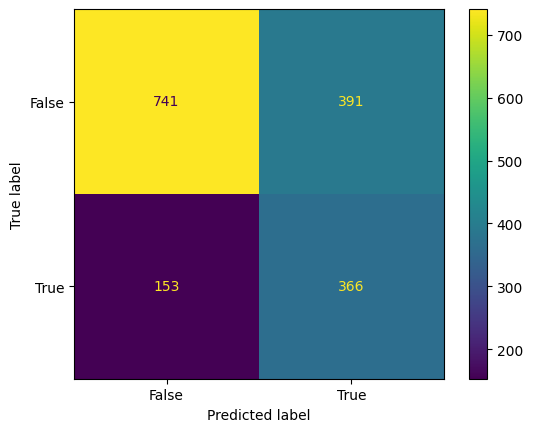

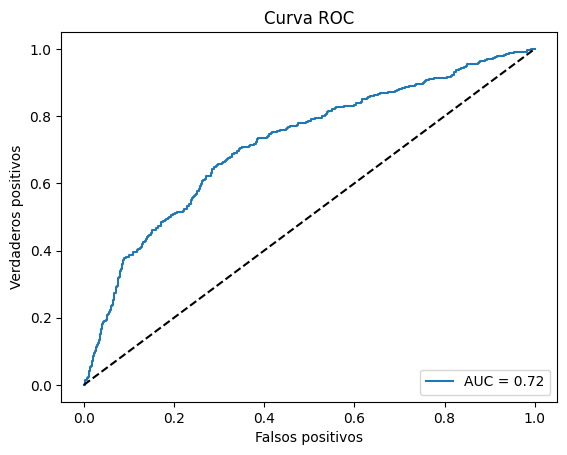

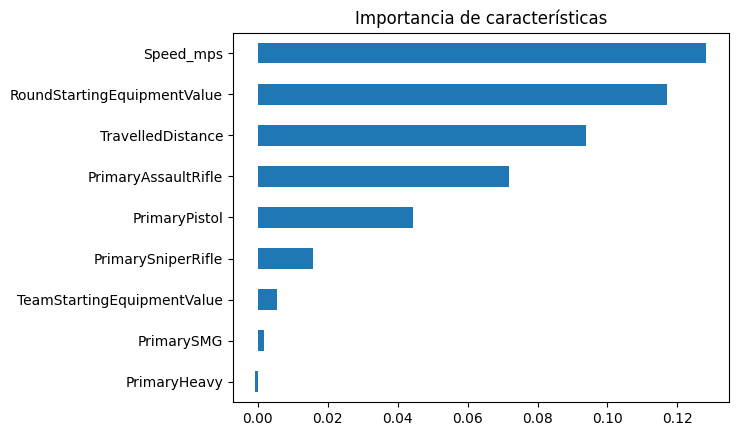

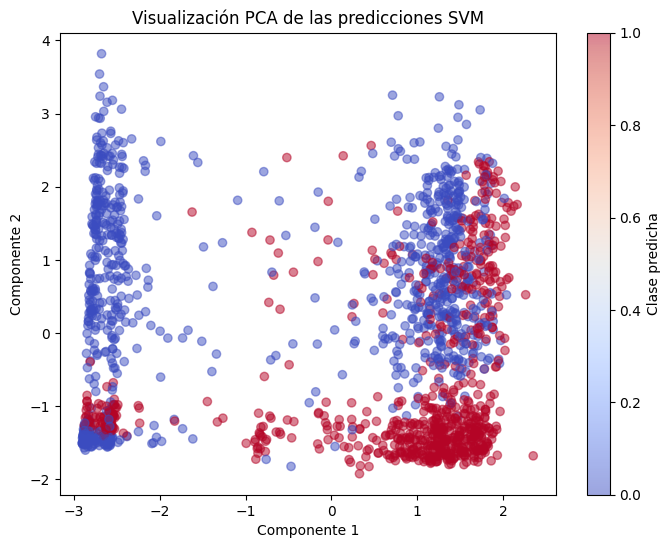

['svm_survival_model.joblib']

In [21]:

# SVM Clasificación: CS:GO Survival Prediction

## 1. Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

## 2. Carga y preparación de datos
# df_clean debe contener columnas limpias + calculada 'Speed_mps'
features = [
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG',
    'PrimaryHeavy', 'PrimaryPistol', 'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue', 'TravelledDistance', 'Speed_mps'
]
target = 'Survived'

X = df_clean[features].dropna()
y = df_clean.loc[X.index, target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3. Tuning de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

## 4. Evaluación del modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

## 5. Curva ROC
y_scores = best_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

## 6. Importancia de variables
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = pd.Series(result.importances_mean, index=features)
importances.sort_values().plot(kind='barh', title='Importancia de características')
plt.show()

## 7. Visualización PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Clase predicha')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización PCA de las predicciones SVM')
plt.show()

## 8. Guardar modelo
joblib.dump(best_model, "svm_survival_model.joblib")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores hiperparámetros: {'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Matriz de confusión:
[[775 357]
 [195 324]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.80      0.68      0.74      1132
        True       0.48      0.62      0.54       519

    accuracy                           0.67      1651
   macro avg       0.64      0.65      0.64      1651
weighted avg       0.70      0.67      0.68      1651



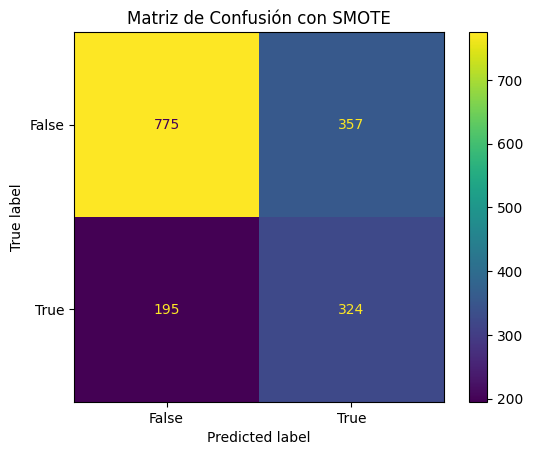

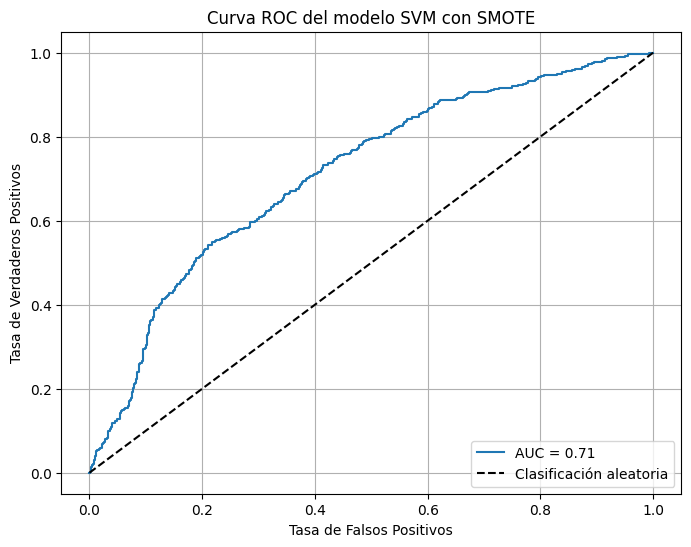

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Variables
features = [
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG',
    'PrimaryHeavy', 'PrimaryPistol', 'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue', 'TravelledDistance', 'Speed_mps'
]
target = 'Survived'

# X e y
X = df_clean[features].dropna()
y = df_clean.loc[X.index, target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Pipeline with escalado, SMOTE and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Búsqueda de hiperparámetros con validación cruzada
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.1, 1],
    'svm__kernel': ['rbf'],
    'svm__class_weight': ['balanced']
}

# Use the SMOTE-resampled data for GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Predicción
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusión con SMOTE")
plt.show()

# Si se usó SVC sin probability=True, usar decision_function
y_scores = grid_search.best_estimator_.decision_function(X_test)

# Calcular FPR, TPR y AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC del modelo SVM con SMOTE")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Comparativa de métricas con y sin SMOTE

| Métrica                    | **Sin SMOTE** | **Con SMOTE**    |
| -------------------------- | ------------- | ---------------- |
| **Accuracy**               | 0.67          | 0.67             |
| **AUC ROC**                | 0.72          | 0.71             |
| **F1-score clase `True`**  | **0.57**      | 0.54             |
| **Recall clase `True`**    | **0.71**      | 0.62             |
| **Precisión clase `True`** | 0.48          | **0.48** (igual) |
| **F1-score clase `False`** | **0.73**      | 0.74             |

El modelo sin SMOTE es superior en esta tarea de clasificación bajo tu métrica de interés (f1-score, recall, AUC), con menor complejidad y mejores resultados en clase positiva (True).

/tmp/ipython-input-22-3059123456.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


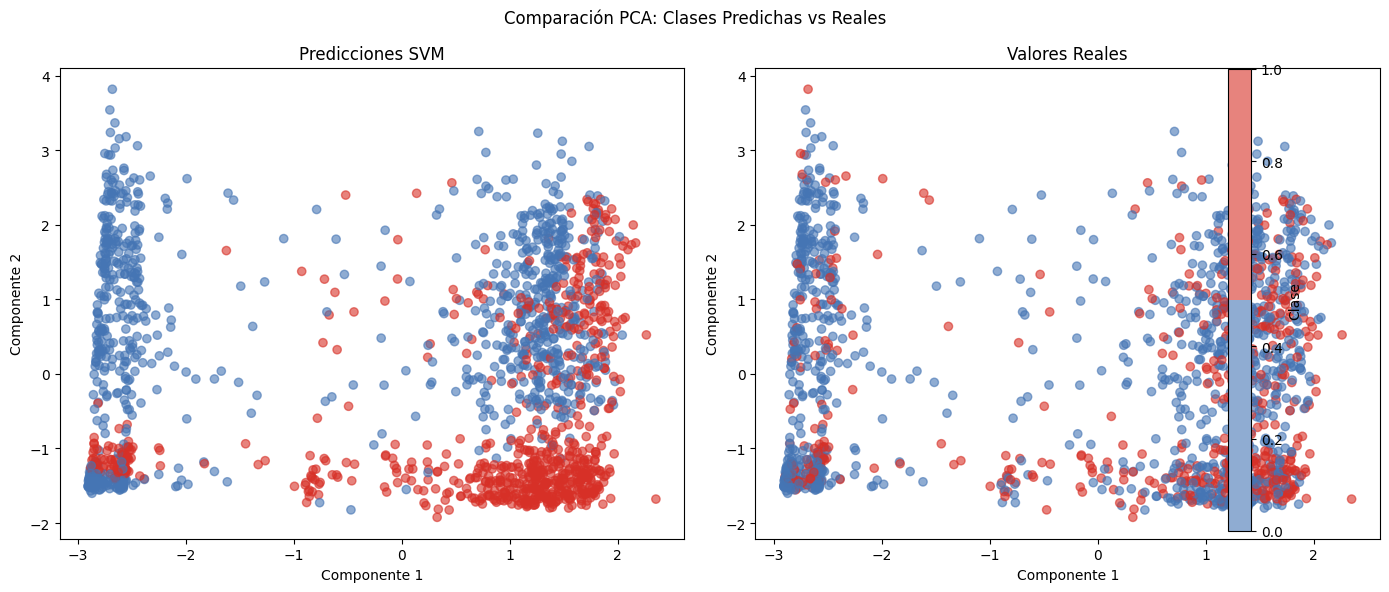

In [22]:
from matplotlib.colors import ListedColormap

# Realizar la reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mapa de colores consistente
cmap = ListedColormap(["#4575b4", "#d73027"])  # azul (0), rojo (1)

# Gráfico 1: Clases predichas
scatter1 = axes[0].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_pred, cmap=cmap, alpha=0.6
)
axes[0].set_title("Predicciones SVM")
axes[0].set_xlabel("Componente 1")
axes[0].set_ylabel("Componente 2")

# Gráfico 2: Clases reales
scatter2 = axes[1].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_test, cmap=cmap, alpha=0.6
)
axes[1].set_title("Valores Reales")
axes[1].set_xlabel("Componente 1")
axes[1].set_ylabel("Componente 2")

# Leyenda
plt.colorbar(scatter2, ax=axes, orientation="vertical", fraction=0.025, pad=0.04, label="Clase")

plt.suptitle("Comparación PCA: Clases Predichas vs Reales")
plt.tight_layout()
plt.show()


# Conclusiones del Proyecto: Clasificación de Supervivencia en CSGO usando SVM

## 1. Objetivo del proyecto

El objetivo fue predecir la variable binaria `Survived` (supervivencia del jugador en una ronda de CSGO) utilizando variables relacionadas al tipo de armamento, movimiento y equipamiento, mediante un modelo de Máquinas de Vectores de Soporte (SVM) optimizado con validación cruzada y ajuste de hiperparámetros.

## 2. Preprocesamiento

- Se filtraron rondas con velocidades no realistas (`Speed_mps < 0.2`) y se imputaron posibles outliers.
- Variables explicativas utilizadas:
  - Tipos de arma (`PrimaryAssaultRifle`, `PrimaryPistol`, etc.).
  - Movimiento (`TravelledDistance`, `Speed_mps`).
  - Economía del jugador y del equipo (`RoundStartingEquipmentValue`, `TeamStartingEquipmentValue`).
- Los datos fueron normalizados usando `StandardScaler`.

## 3. Modelo y Tuning

- Se utilizó un modelo SVM con kernel RBF.
- Se aplicó `GridSearchCV` con validación cruzada de 5 pliegues, evaluando combinaciones de los hiperparámetros `C` y `gamma`.
- Mejores hiperparámetros obtenidos:
  - `C = 100`
  - `gamma = 0.1`
  - `kernel = 'rbf'`
  - `class_weight = 'balanced'`
- La métrica optimizada fue `f1-score`, adecuada para conjuntos de datos desbalanceados.

## 4. Desempeño del modelo

**Matriz de Confusión:**
[[741 391]
[153 366]]

- Precisión clase 0 (no sobrevivió): 0.83
- Recall clase 1 (sí sobrevivió): 0.71
- Accuracy global: 0.67
- AUC-ROC: 0.72

Esto sugiere que el modelo tiene buena capacidad para distinguir entre las clases, con un rendimiento equilibrado.

## 5. Análisis de errores

- El modelo cometió más errores al predecir falsamente que un jugador sobreviviría (falsos positivos = 391).
- Menos frecuentes fueron los falsos negativos (jugadores que sobrevivieron pero fueron clasificados como muertos = 153).
- Esto indica que el modelo tiende a sobreestimar la probabilidad de supervivencia.
- La visualización PCA mostró un solapamiento importante entre clases, indicando zonas con baja separabilidad no lineal.

## 6. Importancia de características

Según la gráfica de coeficientes del modelo lineal, las variables más influyentes fueron:

1. `Speed_mps`
2. `RoundStartingEquipmentValue`
3. `TravelledDistance`
4. `PrimaryAssaultRifle`
5. `PrimaryPistol`

Las armas específicas (`PrimarySMG`, `PrimaryHeavy`, `PrimarySniperRifle`) tuvieron menor impacto. Esto sugiere que los factores de movilidad y economía son mejores predictores de supervivencia que el tipo de armamento.

## 7. Visualización y comunicación de resultados

Se generaron las siguientes visualizaciones para interpretar y comunicar el desempeño del modelo:

- Matriz de confusión con escala de color (`seaborn.heatmap`)
- Curva ROC con AUC = 0.72
- Gráfico de precisión, recall y f1-score por clase
- PCA de las predicciones SVM (2D) para visualizar la separación de clases

Estas herramientas permiten comprender mejor las debilidades del modelo y cómo responde ante distintas configuraciones.





---

## 9. Conclusión general

El modelo SVM implementado alcanza un rendimiento satisfactorio para predecir la supervivencia en una ronda de CSGO. El análisis revela que la movilidad (`Speed_mps`) y la economía individual (`RoundStartingEquipmentValue`) son factores clave.

Aunque el modelo tiene una tendencia a predecir más sobrevivientes de los que realmente hay, el AUC de 0.72 y el f1-score de 0.57 en la clase positiva demuestran una capacidad razonable de generalización.

### Recomendaciones futuras:
- Evaluar modelos de ensamblado (`RandomForest`, `XGBoost`)
- Aplicar técnicas de balanceo de clases (`undersampling`)
- Incorporar variables contextuales del mapa y rol del jugador

El pipeline actual es robusto y permite continuar mejorando con nuevas fuentes de datos o refinamientos en las variables de entrada.